1) Import the datetime module from the datetime library.

In [1]:
import pandas as pd
import datetime

2) Convert the date column to a datetime

In [2]:
url = 'https://gist.githubusercontent.com/misty-garcia/\
8c099128d3f59c32afaa5aa2c3e4fb62/raw/2a4c06ea955266e276a78af5d2e1083cfd348703/mockdates'

df = pd.read_csv(url,sep='\t')

In [3]:
df.head()

,date
0,Mar - 27 - 2022
1,May - 22 - 2022
2,May - 16 - 2022
3,Aug - 22 - 2022
4,Mar - 15 - 2022


In [7]:
df.date = pd.to_datetime(df.date)

In [8]:
#df.date = df.date.astype('datetime64') #Alternative to above

3) Subtract one day from each date

In [9]:
df.date = df.date - pd.Timedelta(days=1)

4) Reformat the dates as "Sun - March 26, 2022"

In [10]:
df.date.dt.strftime('%a - %B %d, %Y')

0       Sat - March 26, 2022
1         Sat - May 21, 2022
2         Sun - May 15, 2022
3      Sun - August 21, 2022
4       Mon - March 14, 2022
               ...          
95    Mon - January 03, 2022
96      Wed - March 23, 2022
97     Sat - August 27, 2022
98    Sun - January 30, 2022
99        Sun - May 15, 2022
Name: date, Length: 100, dtype: object

# San Francisco

In [11]:
from vega_datasets import data

1) Resample by the day and take the average temperature. Visualize the average temperature over time.

In [13]:
df = data.sf_temps()

In [14]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [16]:
df = df.set_index('date')

In [22]:
df_daily = df.resample('D').agg(['mean', 'min', 'max'])

In [23]:
df_daily.head()

temp            
                 mean   min   max
date                             
2010-01-01  49.170833  45.8  53.3
2010-01-02  49.304167  46.0  53.4
2010-01-03  49.391667  46.1  53.5
2010-01-04  49.445833  46.1  53.6
2010-01-05  49.491667  46.1  53.8

In [32]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (temp, mean)  365 non-null    float64
 1   (temp, min)   365 non-null    float64
 2   (temp, max)   365 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB


In [24]:
df_daily.columns

MultiIndex([('temp', 'mean'),
            ('temp',  'min'),
            ('temp',  'max')],
           )

In [29]:
import matplotlib.pyplot as plt

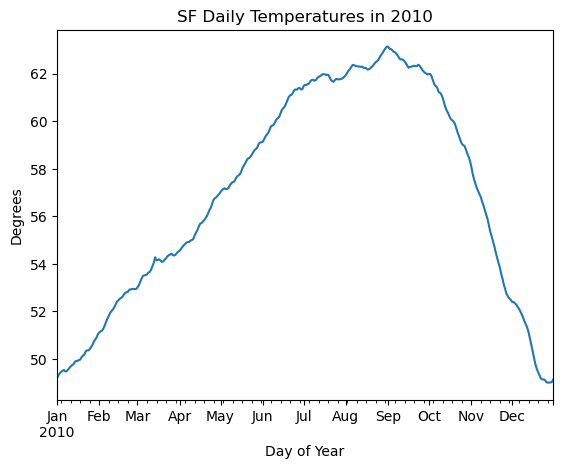

In [34]:
df_daily['temp']['mean'].plot()

plt.title('SF Daily Temperatures in 2010')
plt.ylabel('Degrees')
plt.xlabel('Day of Year')
plt.show()

2) Write the code necessary to visualize the minimum temperature over time.

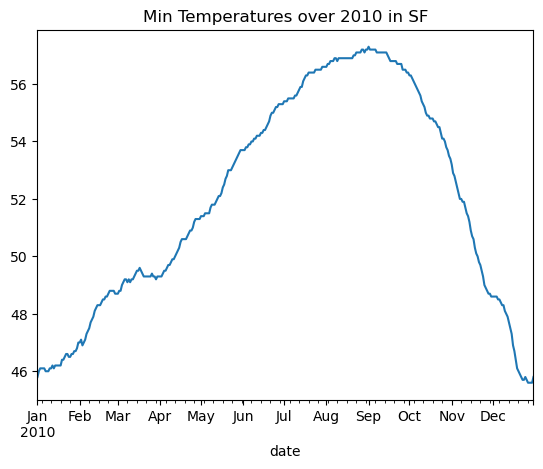

In [35]:
df_daily['temp']['min'].plot()

plt.title('Min Temperatures over 2010 in SF')
plt.show()

3) Write the code necessary to visualize the maximum temperature over time.

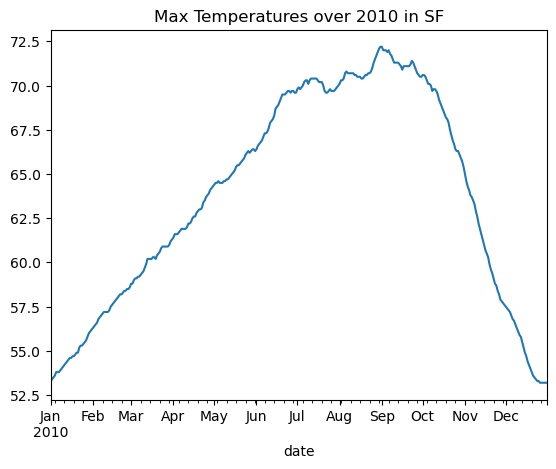

In [36]:
df_daily['temp']['max'].plot()

plt.title('Max Temperatures over 2010 in SF')
plt.show()

4) Which month is the coldest, on average?

In [47]:
df_daily.resample('M').mean().sort_values(by=('temp', 'mean')).head(1)

temp                      
                mean        min        max
date                                      
2010-01-31  49.98414  46.309677  54.651613

5) Which month has the highest average temperature?

In [48]:
df_daily.resample('M').mean().sort_values(by=('temp', 'mean')).tail(1)

temp                      
                 mean        min        max
date                                       
2010-09-30  62.487083  56.903333  71.306667

6) Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [54]:
df_daily['daily_diff'] = df_daily['temp']['max'] - df_daily['temp']['min']

In [63]:
df_daily.daily_diff.resample('M').mean().sort_values().tail(1)

date
2010-09-30    14.403333
Name: daily_diff, dtype: float64

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

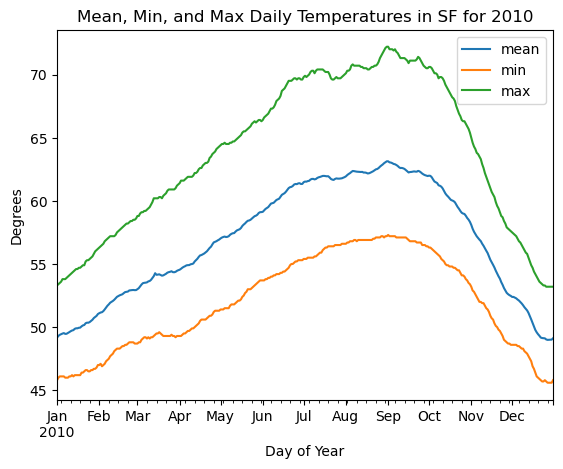

In [68]:
df_daily['temp']['mean'].plot(label='mean')
df_daily['temp']['min'].plot(label='min')
df_daily['temp']['max'].plot(label='max')

plt.title('Mean, Min, and Max Daily Temperatures in SF for 2010')
plt.xlabel('Day of Year')
plt.ylabel('Degrees')
plt.legend()
plt.show()

# Seattle

In [70]:
seattle = data.seattle_weather()

seattle = seattle.set_index('date')

seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


1) Which year and month combination has the highest amount of precipitation?

In [138]:
seattle.resample('M').precipitation.sum().sort_values(ascending=False).head(1)

date
2015-12-31    284.5
Name: precipitation, dtype: float64

2) Visualize the amount of monthly precipitation over time.

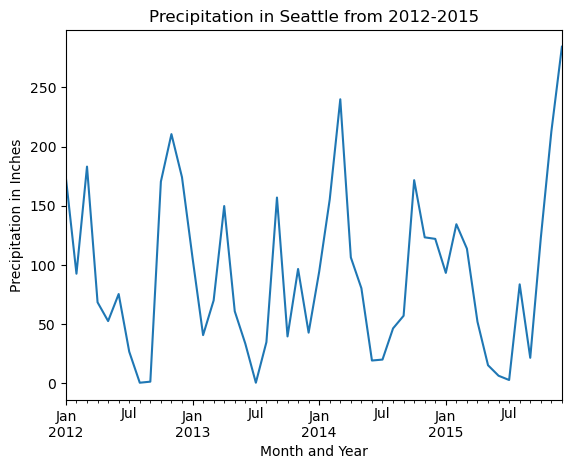

In [141]:
seattle.resample('M').precipitation.sum().plot()

plt.title('Precipitation in Seattle from 2012-2015')
plt.xlabel('Month and Year')
plt.ylabel('Precipitation in Inches')
plt.show()

3) Visualize the amount of wind over time. Choose a time interval you think is appropriate.

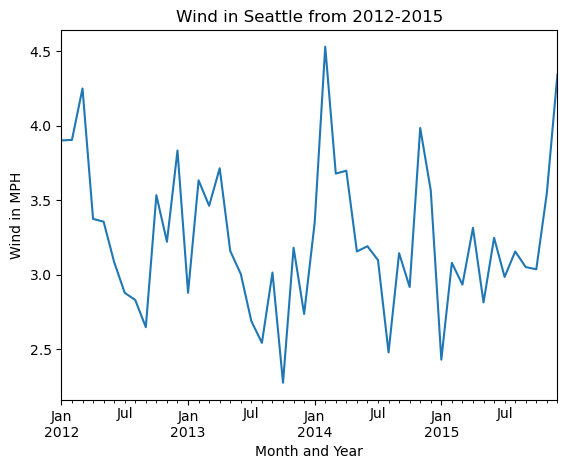

In [81]:
seattle.resample('M').wind.mean().plot()

plt.title('Wind in Seattle from 2012-2015')
plt.xlabel('Month and Year')
plt.ylabel('Wind in MPH')
plt.show()

4) Which year-month combination is the windiest?

In [149]:
seattle.resample('M').wind.mean().sort_values(ascending=False).head(1)

date
2014-02-28    4.528571
Name: wind, dtype: float64

5) What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [89]:
seattle[seattle.weather == 'sun'].index.year.value_counts().head(1)

2014    211
Name: date, dtype: int64

6) In which month does it rain the most?

In [150]:
seattle.precipitation.groupby(seattle.index.month_name()).mean().sort_values(ascending=False).head(1)

date
November    5.354167
Name: precipitation, dtype: float64

7) Which month has the most number of days with a non-zero amount of precipitation?

In [151]:
seattle[seattle.precipitation > 0].index.month_name().value_counts()

December     81
February     73
March        73
November     71
January      66
October      61
April        59
June         37
September    35
May          34
August       22
July         11
Name: date, dtype: int64

# Flights

In [101]:
flights = data.flights_20k()

In [102]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [125]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-13 14:56:00 to 2001-03-14 11:33:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


1) Convert any negative delays to 0.

In [104]:
import numpy as np

In [106]:
flights.delay = np.where(flights.delay < 0, 0, flights.delay)

In [107]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


2) Which hour of the day has the highest average delay?

In [108]:
flights = flights.set_index('date')

In [110]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [116]:
flights.groupby(flights.index.hour).delay.mean().sort_values(ascending=False)

date
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
21     21.626768
20     17.889778
19     16.256557
18     14.514218
16     13.881068
17     13.199580
15     13.137592
13     11.453311
14     10.747320
12      9.214341
11      7.361495
10      5.850953
9       5.002504
8       4.030483
7       3.071932
6       2.494856
5       0.513514
Name: delay, dtype: float64

3) Does the day of the week make a difference in the delay amount?

In [119]:
flights.groupby(flights.index.day_of_week).delay.mean().sort_values(ascending=False)

date
4    17.757596
3    12.821322
2    11.032478
6    10.413542
1     9.410866
5     8.431498
0     7.165772
Name: delay, dtype: float64

4) Does the month make a difference in the delay amount?

In [120]:
flights.groupby(flights.index.month).delay.mean().sort_values(ascending=False)

date
2    12.306106
1    11.301592
3     9.875287
Name: delay, dtype: float64

In [124]:
from scipy import stats

In [135]:
data.birdstrikes()['Cost__Total_$'].sort_values(ascending=False)

5424    7043545
3496    3811576
8634    3644483
7284    3367644
6420    1715077
         ...   
3358          0
3359          0
3360          0
3361          0
9999          0
Name: Cost__Total_$, Length: 10000, dtype: int64